# Module 3
This model goes through a very basic ML application with scikit learn. You'll notice that you can do "machine learning" without actually knowing what's going on behind the scenes but I definitely recommend trying to learn more. 
<br>
The predictions done below are all classification, that is they are trying to predict from a discrete (finite) selection of outcome. This is as opposed to regression which tries to predict from a continuous (infinite) set of outcomes.

In [1]:
# import statements
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
# quality is the outcome we are trying to predict
df = pd.read_csv("WineQT.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [3]:
# We can drop the id column since it is irrelevant to our model
df = df.drop("Id", axis=1)

In [4]:
# Now I am going to partition off a portion of our data to use as a testing set
# In practice, you may do this many times so the model gets 're-calibrated' on a more random data sample
# The sample method randomly samples a certain percetage of your dataframe
test_df = df.sample(frac=(2/10))

# The remainder of our dataset is used as training data
train_df = df.drop(test_df.index)

# The list of possible outcomes
labels = [3, 4, 5, 6, 7, 8]

## Decision Trees
The first model we will look at is a decision tree. They are essenially a long list of if statements.<br>
For example:
![](decision-tree.png)
<br>
Documentaion for the scikitlearn decision tree function is available at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [5]:
# Loading the model. There are numerous parameters that cound be set
clf = tree.DecisionTreeClassifier(max_depth = 3) 

In [6]:
# Training the model
clf.fit(train_df.drop("quality", axis=1), train_df["quality"])

DecisionTreeClassifier(max_depth=3)

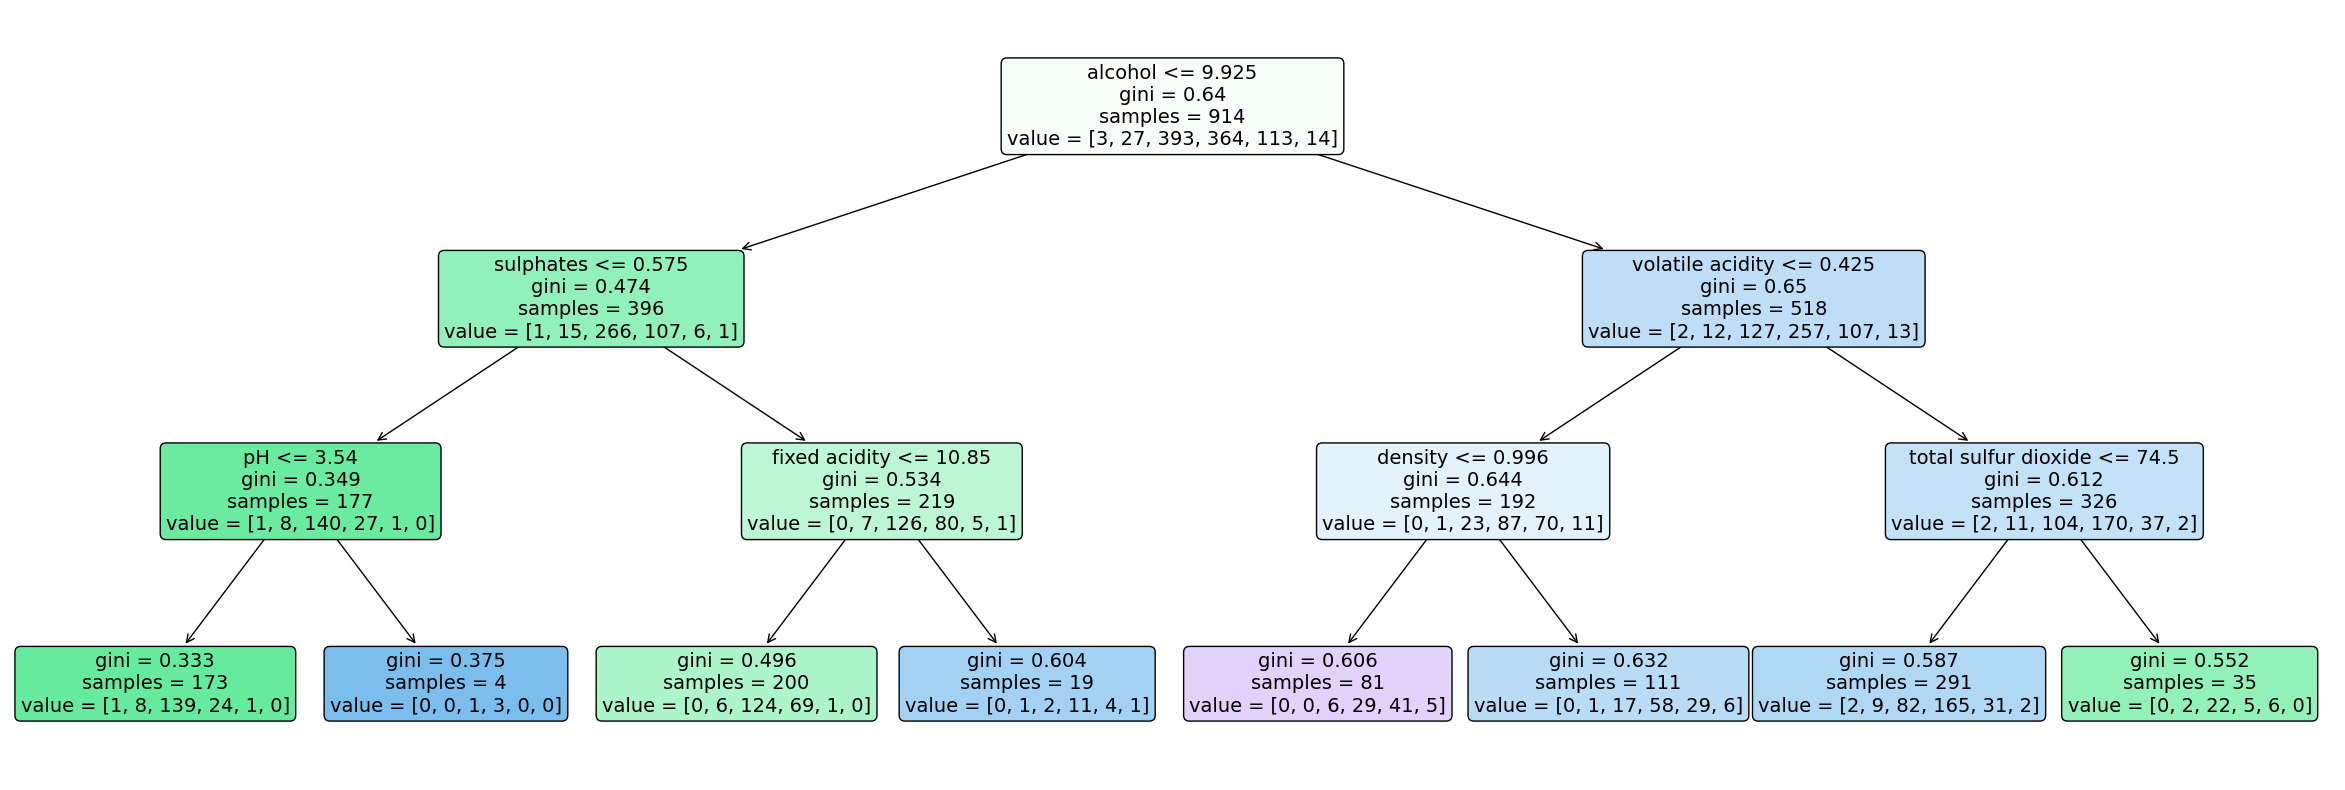

In [7]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10))
#create the tree plot
a = tree.plot_tree(clf,
                   feature_names = train_df.columns,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [8]:
test_predictions = clf.predict(test_df.drop("quality", axis=1))

In [9]:
# Prints the outputs. The most important metric to look at here is accuracy
# If you get divide by zero errors it is because our model was set to never predict certain outputs
# The reason for this is two fold - one, the dataset comtains very few wines whose quality are 3 and 4
# Secondly, the model is constrained to three decisions
print(metrics.classification_report(test_df["quality"], test_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.64      0.62      0.63        90
           6       0.56      0.64      0.60        98
           7       0.54      0.50      0.52        30
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.29      0.29      0.29       229
weighted avg       0.56      0.59      0.57       229



/Users/thomastesselaar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomastesselaar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomastesselaar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [10]:
# The initial model was rather poor, mainly because it was limited in its height
# Removing the max_depth constraint should result in a slightly more accurate model
clf = tree.DecisionTreeClassifier() 
clf.fit(train_df.drop("quality", axis=1), train_df["quality"])
test_predictions = clf.predict(test_df.drop("quality", axis=1))
print(metrics.classification_report(test_df["quality"], test_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.66      0.66      0.66        90
           6       0.65      0.52      0.58        98
           7       0.46      0.63      0.54        30
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.30      0.30      0.30       229
weighted avg       0.60      0.56      0.58       229



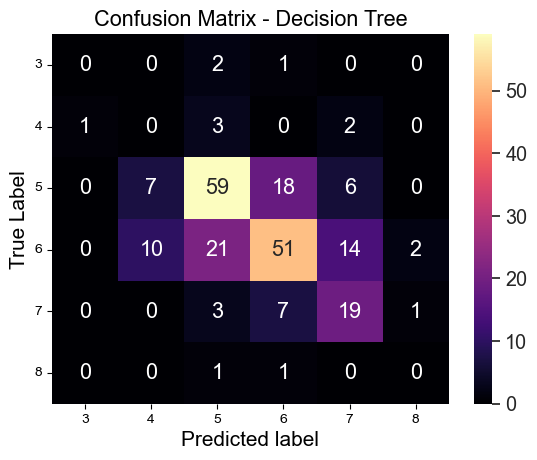

<Figure size 1000x700 with 0 Axes>

In [11]:
# Decision trees are useful because they are simple and we can see exactly how they are making their decisions 
# They are also constrained in their effectiveness

confusion_matrix = metrics.confusion_matrix(test_df["quality"],test_predictions) #turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

## K Nearest Neighbours
K Nearest Neighbours, or KNN isn't really a machine learning models because the machine doesn't do any learning. Instead, this models takes a geometric sort of approach - it finds the k (where k is an int that we can choose) data points "nearest" to the element we want to predict, and based on the values it makes a guess. <br>
For example, if we chose k to be ten, and of the ten nearest data points, 2 have a quality of 5, 5 have a quality of 6, and 2 have a quality of 7, then the model would predict a quality of 6.

In [12]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_df.drop("quality", axis=1), train_df["quality"])
test_predictions = knn.predict(test_df.drop("quality", axis=1))
print(metrics.classification_report(test_df["quality"], test_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.47      0.59      0.52        90
           6       0.49      0.48      0.49        98
           7       0.45      0.33      0.38        30
           8       0.00      0.00      0.00         2

    accuracy                           0.48       229
   macro avg       0.24      0.23      0.23       229
weighted avg       0.46      0.48      0.47       229



/Users/thomastesselaar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomastesselaar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomastesselaar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

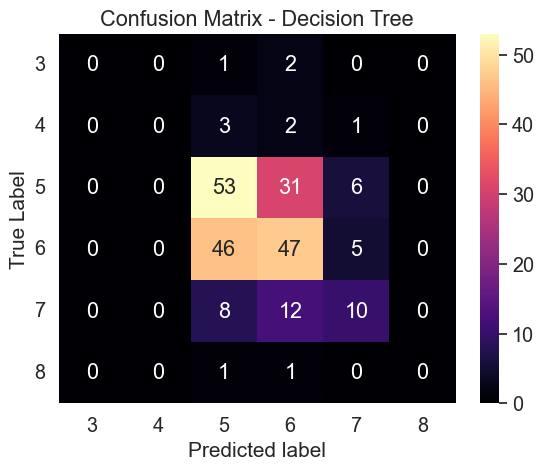

<Figure size 1000x700 with 0 Axes>

In [13]:
confusion_matrix = metrics.confusion_matrix(test_df["quality"],test_predictions) #turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

## Naive Bayes
Naive Bayes is a probablistic approach to prediction, it essentially uses bayes theorem to work backwards and calculate the relative probabilities of each input given the output and then matches from there. <br>
There are many different ways this can be implemented, see the below link for a few of them. You could try them out and see if it affects model accuracy at all.<br>

https://scikit-learn.org/stable/modules/naive_bayes.html

In [14]:
nb = naive_bayes.GaussianNB()
nb.fit(train_df.drop("quality", axis=1), train_df["quality"])
test_predictions = nb.predict(test_df.drop("quality", axis=1))
print(metrics.classification_report(test_df["quality"], test_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.17      0.17      0.17         6
           5       0.65      0.52      0.58        90
           6       0.50      0.53      0.51        98
           7       0.34      0.37      0.35        30
           8       0.00      0.00      0.00         2

    accuracy                           0.48       229
   macro avg       0.28      0.26      0.27       229
weighted avg       0.52      0.48      0.50       229



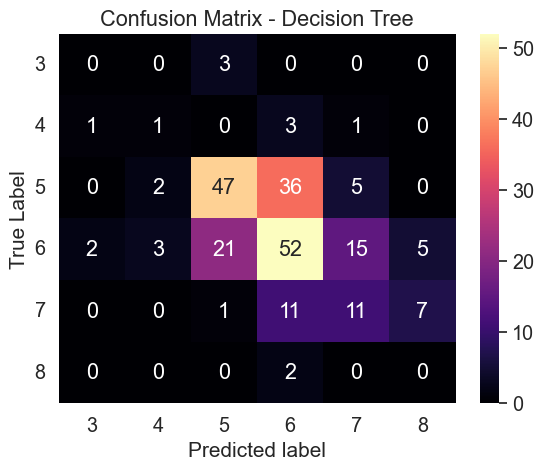

<Figure size 1000x700 with 0 Axes>

In [15]:
confusion_matrix = metrics.confusion_matrix(test_df["quality"],test_predictions) #turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

Overall the above models didn't perform super well, definitely not up to what we'd ideally have in terms of performance. That being said, for each model there are parameters we could have altered to optimize performance. These models tend to be fine for simpler tasks when their simplicity and lighter computational load outweigh the potenial benefits of a more complex model. For more complex tasks however, better and more complex models are needed as well. <br>
Module 4 goes through as exmple of building one of these models using tensorflow
